Le data set est dans : https://www.kaggle.com/datasets/kmader/finding-lungs-in-ct-data/

A exemple of a segmentation images with CE-Net

![exemple](image_1.png)

In [6]:
import os
import numpy as np
import pandas as pd
import math 
import cv2
import tensorflow as tf

In [4]:
images_path = './archive/2d_images'
mask_path = './archive/2d_masks'
test = './archive/2d_masks/ID_0000_Z_0142.tif'

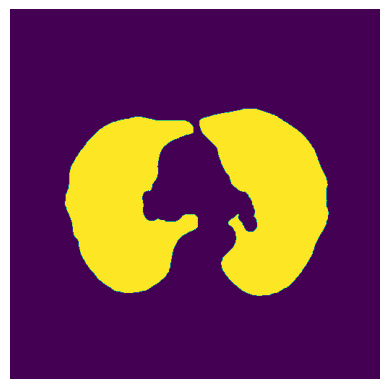

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Charger l'image depuis le chemin spécifié
img = mpimg.imread(test)

# Afficher l'image
plt.imshow(img)
plt.axis('off')  # Masquer les axes
plt.show()
